In [1]:
#!pip install tensorflow-gpu

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Importing the dataset from kaggle
# Installing Kaggle API
!pip install -q kaggle

In [5]:
# create a directory as kaggle
! mkdir -p ~/.kaggle

In [6]:
#copy API key to kaggle directory
! cp kaggle.json ~/.kaggle/

In [7]:
#disable API key
! chmod 600 /root/.kaggle/kaggle.json

In [8]:
# list of kaggle datasets
! kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39          10728       1460  0.9375           
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                        2MB  2022-05-15 00:01:23           2764        101  1.0              
mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education    6KB  2022-04-16 04:46:28           7210        191  1.0              
paradisejoy/top-hits-spotify-from-20002019   

In [11]:
# importing the dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud

 91% 60.0M/66.0M [00:00<00:00, 89.4MB/s]
100% 66.0M/66.0M [00:00<00:00, 80.9MB/s]


In [12]:
# unzipping the dataset
! unzip -q /content/creditcardfraud.zip

In [13]:
dataset_1 = pd.read_csv("/content/creditcard.csv")
dataset_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
dataset_1.shape

(284807, 31)

In [17]:
dataset_1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [18]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [19]:
# observations in each class
dataset_1['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [20]:
# balance this dataset
fraud = dataset_1[dataset_1['Class']==1]
non_fraud = dataset_1[dataset_1['Class']==0]

In [22]:
fraud.shape,non_fraud.shape

((492, 31), (284315, 31))

In [23]:
# random selection of samples
non_fraud_t = non_fraud.sample(n=492)

In [24]:
non_fraud_t.shape

(492, 31)

In [26]:
# merge dataset
dataset = fraud.append(non_fraud_t,ignore_index=True)

In [27]:
# observations in each class
dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [28]:
# matrix of features
x = dataset.drop(labels=['Class'],axis = 1)

In [29]:
# dependent variable
y = dataset['Class']

In [30]:
x.shape,y.shape

((984, 30), (984,))

In [31]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
x_train.shape,x_test.shape

((787, 30), (197, 30))

In [33]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
x_train

array([[-1.00688475,  0.28610933, -0.33973876, ..., -0.75088826,
        -1.00049539, -0.36269524],
       [-0.7735338 ,  0.51014563, -0.07691909, ...,  0.4689383 ,
         0.61150701, -0.44894863],
       [-0.80974484,  0.19184146,  0.11503418, ...,  0.31105195,
         0.46160795, -0.44802407],
       ...,
       [ 1.58926708,  0.82948928, -0.42404084, ..., -0.18667478,
        -0.15688915, -0.44844783],
       [ 0.44000547,  0.51500111, -0.72169504, ...,  0.04301399,
         0.64347065,  0.63594099],
       [ 1.38263555,  0.81094997, -0.9240463 , ..., -0.0141448 ,
        -0.24610547, -0.44417175]])

In [35]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [36]:
x_train.shape,x_test.shape

((787, 30), (197, 30))

In [37]:
x_train = x_train.reshape(787,30,1)
x_test = x_test.reshape(197,30,1)

In [38]:
x_train.shape,x_test.shape

((787, 30, 1), (197, 30, 1))

In [39]:
# Creating the object
model = tf.keras.models.Sequential()

In [40]:
# 1st CNN layer
model.add(tf.keras.layers.Conv1D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(30,1)))

In [41]:
# adding batch normalization
model.add(tf.keras.layers.BatchNormalization()) # fights internal covariance shift problem

In [42]:
# adding the maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

In [43]:
# adding Dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [44]:
# 2nd CNN layer
model.add(tf.keras.layers.Conv1D(filters=64,kernel_size=2,padding="same",activation="relu"))
# adding batch normalization
model.add(tf.keras.layers.BatchNormalization())
# adding the maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))
# adding Dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [45]:
# adding flatten layer
model.add(tf.keras.layers.Flatten())

In [46]:
# 1st dense layer
model.add(tf.keras.layers.Dense(units=64,activation="relu"))
# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [47]:
# output layer
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 30, 32)           128       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 32)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 15, 64)           2

In [49]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [50]:
history = model.fit(x_train,y_train,epochs=25,validation_data=(x_test,y_test))

Epoch 1/25
25/25 [==============================] - 14s 37ms/step - loss: 0.8966 - accuracy: 0.5578 - val_loss: 0.6438 - val_accuracy: 0.7259
Epoch 2/25
25/25 [==============================] - 0s 10ms/step - loss: 0.6954 - accuracy: 0.6887 - val_loss: 0.6073 - val_accuracy: 0.8325
Epoch 3/25
25/25 [==============================] - 0s 9ms/step - loss: 0.5262 - accuracy: 0.7738 - val_loss: 0.5762 - val_accuracy: 0.8579
Epoch 4/25
25/25 [==============================] - 0s 12ms/step - loss: 0.4535 - accuracy: 0.8145 - val_loss: 0.5441 - val_accuracy: 0.8934
Epoch 5/25
25/25 [==============================] - 0s 9ms/step - loss: 0.4039 - accuracy: 0.8386 - val_loss: 0.5132 - val_accuracy: 0.9036
Epoch 6/25
25/25 [==============================] - 0s 12ms/step - loss: 0.4040 - accuracy: 0.8488 - val_loss: 0.4811 - val_accuracy: 0.9188
Epoch 7/25
25/25 [==============================] - 0s 10ms/step - loss: 0.4026 - accuracy: 0.8475 - val_loss: 0.4433 - val_accuracy: 0.9340
Epoch 8/25
25/

In [51]:
# model predictions
y_pred = (model.predict(x_test) > 0.5).astype("int32")

In [54]:
print(y_pred[101]),print(y_test[101])

[1]
1


(None, None)

In [55]:
# confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[105   1]
 [  9  82]]


In [56]:
acc_cm = accuracy_score(y_test,y_pred)

In [57]:
print(acc_cm)

0.949238578680203


## LEARNING CURVE

In [58]:
# Plotting the learning curve
def learning_curve(history,epoch):
  # training vs validation accuracy
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("Model Accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(['Train','val'],loc='upper left')
  plt.show()
  # training vs validation loss
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model Loss")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  plt.legend(['Train','val'],loc='upper left')
  plt.show()

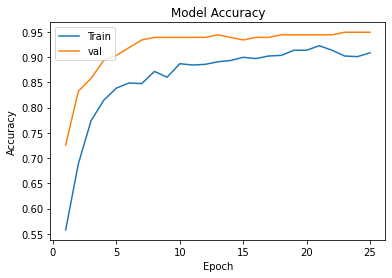

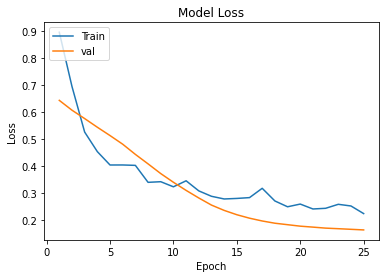

In [59]:
learning_curve(history,25)